Imports

In [110]:
from ipynb.fs.full.airbnb import DF

import pandas as pd

import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

Global Declarations

In [14]:
X = DF.drop('price', axis = 1)
X = X.drop('id', axis = 1)
y = DF[['price']]

Regression Model

In [109]:
poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 100)

reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)

print('Intercept: ',reg_model.intercept_)
list(zip(X, reg_model.coef_))

y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train)

y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

reg_model_diff = pd.DataFrame({'Actual value': y_test.iloc[:, 0], 'Predicted value': y_pred.iloc[:, 0]})
reg_model_diff.dropna(inplace=True)
reg_model_diff

Intercept:  [179.56615234]


,Actual value,Predicted value
2,187.0,382.907965
4,85.0,183.030083
9,292.0,239.336173
17,425.0,197.364395
34,69.0,296.694911
...,...,...
5422,283.0,268.576946
5423,135.0,291.693696
5426,58.0,116.401637
5427,55.0,195.197925


Model Visualization

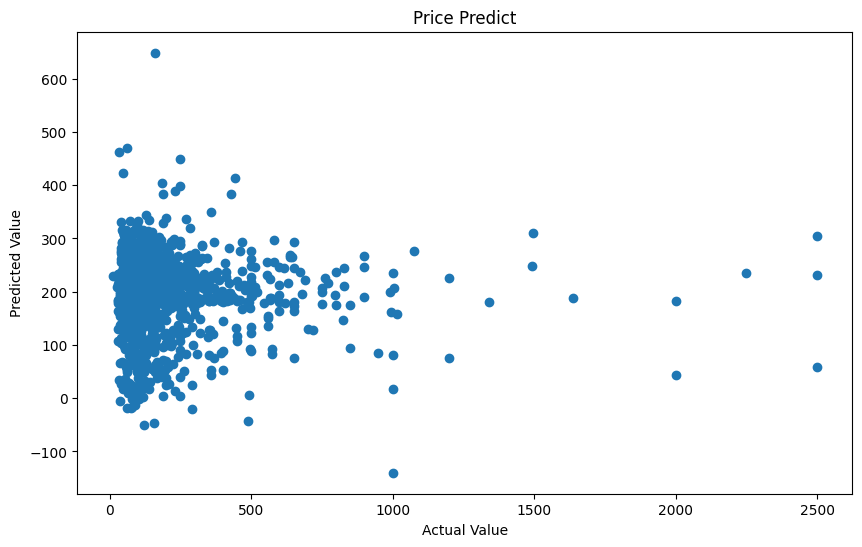

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(reg_model_diff.iloc[:, 0], reg_model_diff.iloc[:, 1])
plt.title("Price Predict")
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()